![Hurricane Irma](Images/Hurricane-Irma-satellite.jpg)

# HurriPy Irma

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt # Plotting library
import pandas as pd
import numpy as np
import requests
import datetime
import sys
# Import API key
from api_keys import noaa_key
print("All necessary libraries installed")

All necessary libraries installed


# Hurricane Irma

### Irma was the second-most intense tropical cyclone worldwide in 2017 in terms of barometric pressure, and the strongest worldwide in 2017 in terms of wind speed.
**_Hurricane Irma made landfall over the southern Florida mainland around 1 p.m. local time Sunday, Sept. 10 as a Category 3 storm, packing winds of more than 110 miles per hour.It was also the most intense hurricane to strike the continental United States since Katrina,first Category 5 hurricane of the 2017 season, Irma caused widespread and catastrophic damage throughout its long lifetime, particularly in the northeastern Caribbean and the Florida Keys.The word Irmageddon was coined soon after the hurricane to describe the damage caused by the hurricane_**

## Location id:  Florida ("FIPS:12")

### Dataset id: "GHCND" (name: "Daily Summaries")

![Irma landfall](Images/Hurricane_Irma_landfall.jpg)

## Let's see all the stations near Southern Florida where Irma made landfall

In [2]:
import json
# Let's get fetch all the stations in Marco Island and Southern Florida
mytoken = noaa_key
location_id = "FIPS:12"
dataset_id = "GHCND"
zipcodes = ["ZIP:33196","ZIP:33042","ZIP:34145","ZIP:34113","ZIP:34141","ZIP:33034","ZIP:34117","ZIP:34104","ZIP:34105"]
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?"
# Let's create a list to hold the responses from API call
station_id = []
station_name = []
latitude = []
longitude = []
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid=GHCND"+"&"+"locationid="+str(zipcode)+"&"+"limit=50"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    # Let's fill the dictionaries from the response file
    for i in range(len(response_json["results"])):
        try:
            station_id.append(response_json["results"][i]["id"])
            station_name.append(response_json["results"][i]["name"])
            latitude.append(response_json["results"][i]["latitude"])
            longitude.append(response_json["results"][i]["longitude"])
            # Handle exceptions for data not found in the response file
        except(KeyError, ValueError):
            # Print error message
            print("Index {} : Data Not found ! Skipping..".format(i))
            pass

Zipcode :ZIP:33196
Request status code: 200
Zipcode :ZIP:33042
Request status code: 200
Zipcode :ZIP:34145
Request status code: 200
Zipcode :ZIP:34113
Request status code: 200
Zipcode :ZIP:34141
Request status code: 200
Zipcode :ZIP:33034
Request status code: 200
Zipcode :ZIP:34117
Request status code: 200
Zipcode :ZIP:34104
Request status code: 200
Zipcode :ZIP:34105
Request status code: 200


## Creating a dataframe from the response

In [3]:
# Let's create a DataFrame with the lists
df_SouthFLstations = pd.DataFrame({
    "Station id": station_id,
    "Station name": station_name,
    "Latitude": latitude,
    "Longitude": longitude
})
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_SouthFLstations",df_SouthFLstations.shape)+'\033[0m')
df_SouthFLstations.head(10) # Display the DataFrame

The shape of the df_SouthFLstations dataframe is: (33, 4)


,Station id,Station name,Latitude,Longitude
0,GHCND:US1FLMD0022,"HAMMOCKS 0.5 SSE, FL US",25.665000,-80.439500
1,GHCND:US1FLMD0068,"HAMMOCKS 0.9 SSE, FL US",25.658996,-80.438113
2,GHCND:USC00086988,"PENNSUCO 5 WNW, FL US",25.929720,-80.453890
3,GHCND:USC00088780,"TAMIAMI TRAIL 40 MI. BEND, FL US",25.760800,-80.824100
4,GHCND:USR0000FCHE,"CHEKIKA FLORIDA, FL US",25.625000,-80.579700
5,GHCND:USW00012888,"MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US",25.647500,-80.433060
6,GHCND:US1FLMN0006,"CUDJOE KEY 0.9 SSW, FL US",24.659425,-81.506312
7,GHCND:US1FLMN0013,"SUGARLOAF KEY 1.0 NW, FL US",24.668249,-81.538221
8,GHCND:US1FLMN0041,"RAMROD KEY 0.7 ESE, FL US",24.658129,-81.405138
9,GHCND:US1FLCR0003,"MARCO 0.2 SSE, FL US",25.939560,-81.715390


In [4]:
# Let's create a list of stations 
SouthFLstations = pd.Series(df_SouthFLstations["Station id"])

## Let's collect data from the selected zipcodes close to the days Irma made landfall

### Collect response from the selected zipcodes 

In [5]:
import json
# Let's get fetch data from all the stations in Marco Island and Southern Florida
mytoken = noaa_key
location_id = "FIPS:12"
dataset_id = "GHCND"
zipcodes = ["ZIP:33196","ZIP:33042","ZIP:34145","ZIP:34113","ZIP:34141","ZIP:33034","ZIP:34117","ZIP:34104","ZIP:34105"]
start_date = "2017-09-05"
end_date = "2017-09-16"
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?"
# Let's create a list of dictionaries
weather_data = []
# Display the start of Data Retrieval
#print(f"****** Beginning Data Retrieval *********")
# Let's fill the dictionaries from the response file
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid="+str(dataset_id)+"&"+"locationid="+str(zipcode)+"&"+"startdate="+str(start_date)+"&"+"enddate="+str(end_date)+"&"+"limit=50"+"&"+"units=standard"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    if len(response_json["results"]) != 0:
        for i in range(len(response_json["results"])):
            try:
                datatype = response_json["results"][i]["datatype"]
                date = response_json["results"][i]["date"]
                station = response_json["results"][i]["station"]
                value = response_json["results"][i]["value"]
                weather_data.append({"DataType":datatype,
                                    "Date":date,
                                    "Station id":station,
                                    "Value":value})
            # Handle exceptions for data not found in the response file
            except(KeyError, ValueError):
            # Print error message
                print("Index {} : Data Not found ! Skipping..".format(i))
            pass
    else:
        continue
        
#print(f"****** Data Retrieval Complete **********")

Zipcode :ZIP:33196
Request status code: 200
Zipcode :ZIP:33042
Request status code: 200
Zipcode :ZIP:34145
Request status code: 200
Zipcode :ZIP:34113
Request status code: 200
Zipcode :ZIP:34141
Request status code: 200
Zipcode :ZIP:33034
Request status code: 200
Zipcode :ZIP:34117
Request status code: 200
Zipcode :ZIP:34104
Request status code: 200
Zipcode :ZIP:34105
Request status code: 200


### Creating a dataframe from the response

In [6]:
# Let's create a DataFrame with the lists
df_weather = pd.DataFrame(weather_data)
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_weather",df_weather.shape)+'\033[0m')
df_weather.head() # Display the DataFrame

The shape of the df_weather dataframe is: (683, 4)


,DataType,Date,Station id,Value
0,PRCP,2017-09-05T00:00:00,GHCND:US1FLMD0022,0.0
1,SNOW,2017-09-05T00:00:00,GHCND:US1FLMD0022,0.0
2,PRCP,2017-09-05T00:00:00,GHCND:US1FLMD0068,0.0
3,SNOW,2017-09-05T00:00:00,GHCND:US1FLMD0068,0.0
4,TAVG,2017-09-05T00:00:00,GHCND:USR0000FCHE,86.0


In [7]:
# Let's create a list of stations 
LWeatherStations = pd.Series(df_weather["Station id"])

![Hurricane Irma](Images/Hurricane-IrmaA.jpg)

### Any common stations between the  two lists ?

In [8]:
def common_member (x,y):
    x_set = set(x)
    y_set = set(y)
    if len(x_set.intersection(y_set))>0:
        return(True)
    return(False)
print('\033[1m'+"Are there common stations between lists? {}" .format(common_member(LWeatherStations,SouthFLstations))+'\033[0m')

Are there common stations between lists? True


In [9]:
x_set = set(LWeatherStations)
y_set = set(SouthFLstations)
print('\033[1m'+"Number of stations without geo-cordinates: {}" .format(len(x_set-y_set))+'\033[0m')
print('\033[1m'+"Stations without geo-cordinates: {}" .format((x_set-y_set))+'\033[0m')

Number of stations without geo-cordinates: 0
Stations without geo-cordinates: set()


## Creating a combined dataframe with geo coordinates

In [10]:
# Combine the dataframes into a single dataframe
df_SouthFLWeather = pd.merge(df_weather, df_SouthFLstations, how="inner", on="Station id")
# Using list comprehensions to remove the time stamp from Date
df_SouthFLWeather["Date"] = [v[:-9] for v in df_SouthFLWeather["Date"]]
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" .format("df_SouthFLWeather",df_SouthFLWeather.shape)+'\033[0m')
df_SouthFLWeather.head()

The shape of the df_SouthFLWeather dataframe is (905, 7):


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2017-09-05,GHCND:US1FLMD0022,0.00,"HAMMOCKS 0.5 SSE, FL US",25.665,-80.4395
1,SNOW,2017-09-05,GHCND:US1FLMD0022,0.00,"HAMMOCKS 0.5 SSE, FL US",25.665,-80.4395
2,PRCP,2017-09-06,GHCND:US1FLMD0022,0.00,"HAMMOCKS 0.5 SSE, FL US",25.665,-80.4395
3,SNOW,2017-09-06,GHCND:US1FLMD0022,0.00,"HAMMOCKS 0.5 SSE, FL US",25.665,-80.4395
4,PRCP,2017-09-07,GHCND:US1FLMD0022,0.15,"HAMMOCKS 0.5 SSE, FL US",25.665,-80.4395


In [11]:
# Let's see the unique datatypes in the final DataFrame
print(df_SouthFLWeather["DataType"].unique().tolist())

['PRCP', 'SNOW', 'DAPR', 'MDPR', 'TAVG', 'TMAX', 'TMIN', 'AWND', 'SNWD', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT03', 'TOBS', 'WT11', 'WT08', 'WT02', 'PGTM']


## Definition of the data types :
* PRCP  : Precipitation (mm or inches)
* DAPR  : Number of days included in multiday precipitation total (MDPR)
* SNOW  : Snowfall (mm or inches)
* MDPR  : Multiday precipitation total (mm or inches)
* TMAX  : Maximim Temperature (Fahrenheit or Celsius)
* TMIN  : Minimum Temperature (Fahrenheit or Celsius)
* TOBS  : Temperature at the time of observation (Fahrenheit or Celsius)
* WT11  : High or damaging winds
* WT03  : Ice pellets, sleet, snow pellets or small hail

## Let's see how many data points are available for each weather types

In [12]:
# Let's groupby data-type column in the dataframe and count the ocurrences
grouped_count = df_SouthFLWeather["DataType"].groupby(df_SouthFLWeather["DataType"]) # Create a GroupBy object
# Let's create a dataframe with the number of data points for each weather data type
weather_count_unsorted = grouped_count.count().to_frame("Count")
# Let's sort the dataframe by number of count
weather_count = weather_count_unsorted.sort_values(by="Count",ascending=False)
# Let's reset index in the new dataframe
weather_count.reset_index(inplace=True)
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of weather count dataframe is {}:" .format(weather_count.shape)+'\033[0m')
weather_count.head()

The shape of weather count dataframe is (20, 2):


,DataType,Count
0,PRCP,196
1,TMIN,180
2,TMAX,180
3,TOBS,90
4,TAVG,60


## Precipitation in Southern Florids when hurricane Irma made landfall

In [13]:
# Let's create a precipitation dataframe
df_prcp_unsorted = df_SouthFLWeather.loc[(df_SouthFLWeather["DataType"]=="PRCP"),:]
# Let's sort the dataframe by Date
df_prcp = df_prcp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_prcp.to_csv("Output_Data/Irma_Prcp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the precipitation dataframe is:{}".format(df_prcp.shape)+'\033[0m')
df_prcp.head()

The shape of the precipitation dataframe is:(196, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2017-09-05,GHCND:US1FLMD0022,0.00,"HAMMOCKS 0.5 SSE, FL US",25.665000,-80.439500
1,PRCP,2017-09-05,GHCND:USW00092826,0.46,"EVERGLADES CITY 5 NE, FL US",25.899600,-81.318300
2,PRCP,2017-09-05,GHCND:US1FLCR0042,1.03,"CHOKOLOSKEE 0.3 ENE, FL US",25.816577,-81.357293
3,PRCP,2017-09-05,GHCND:USC00086078,0.00,"NAPLES, FL US",26.165300,-81.684300
4,PRCP,2017-09-05,GHCND:USC00086078,0.00,"NAPLES, FL US",26.165300,-81.684300


In [14]:
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_prcp["Value"].groupby(df_prcp["Date"]) # Create a GroupBy object
# Let's create a dataframe with maximum precipitation per day
df_prcp_max_unsorted = grouped_count.max().to_frame("Value")
# Let's sort the dataframe by date
df_prcp_max = df_prcp_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp_max.reset_index(inplace=True)
# Save the dataframe to the output file
df_prcp_max.to_csv("Output_Data/Irma_Prcp_max.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the max per day precipitation dataframe is:{}".format(df_prcp_max.shape)+'\033[0m')
df_prcp_max.head()

The shape of the max per day precipitation dataframe is:(12, 2)


,Date,Value
0,2017-09-05,1.03
1,2017-09-06,1.36
2,2017-09-07,2.42
3,2017-09-08,1.85
4,2017-09-09,2.54


## Maximum Temperature in Southern Florida when hurricane Irma made landfall

In [15]:
# Let's create maximum temperature dataframe
df_MaxTemp_unsorted = df_SouthFLWeather.loc[(df_SouthFLWeather["DataType"]=="TMAX"),:]
# Let's sort the dataframe by Date
df_MaxTemp = df_MaxTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MaxTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MaxTemp.to_csv("Output_Data/Irma_MaxTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the max temperature dataframe is:{}".format(df_MaxTemp.shape)+'\033[0m')
df_MaxTemp.head()

The shape of the max temperature dataframe is:(180, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMAX,2017-09-05,GHCND:USR0000FCHE,92.0,"CHEKIKA FLORIDA, FL US",25.6250,-80.5797
1,TMAX,2017-09-05,GHCND:USR0000FRAC,91.0,"RACCOON POINT FLORIDA, FL US",25.9708,-80.9000
2,TMAX,2017-09-05,GHCND:USR0000FOAS,96.0,"OASIS FLORIDA, FL US",25.8500,-81.0300
3,TMAX,2017-09-05,GHCND:USW00092826,97.0,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183
4,TMAX,2017-09-05,GHCND:USC00087760,98.0,"ROYAL PALM RANGER STATION, FL US",25.3866,-80.5936


## Minimum Temperature in Southern Florids when hurricane Irma made landfall

In [16]:
# Let's create minimum temperature dataframe
df_MinTemp_unsorted = df_SouthFLWeather.loc[(df_SouthFLWeather["DataType"]=="TMIN"),:]
# Let's sort the dataframe by Date
df_MinTemp = df_MinTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MinTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MinTemp.to_csv("Output_Data/Irma_MinTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[96m'+'\033[1m'+"The shape of the minimum temperature dataframe is:{}".format(df_MinTemp.shape)+'\033[0m')
df_MinTemp.head()

The shape of the minimum temperature dataframe is:(180, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMIN,2017-09-05,GHCND:USR0000FCHE,82.0,"CHEKIKA FLORIDA, FL US",25.6250,-80.5797
1,TMIN,2017-09-05,GHCND:USR0000FRAC,75.0,"RACCOON POINT FLORIDA, FL US",25.9708,-80.9000
2,TMIN,2017-09-05,GHCND:USR0000FOAS,78.0,"OASIS FLORIDA, FL US",25.8500,-81.0300
3,TMIN,2017-09-05,GHCND:USW00092826,77.0,"EVERGLADES CITY 5 NE, FL US",25.8996,-81.3183
4,TMIN,2017-09-05,GHCND:USC00087760,76.0,"ROYAL PALM RANGER STATION, FL US",25.3866,-80.5936


## Wind in Southern Florida when hurricane Irma made landfall

In [17]:
# Let's create high damaging windspeed dataframe
df_WT11_unsorted = df_SouthFLWeather.loc[(df_SouthFLWeather["DataType"]=="WT11"),:]
# Let's sort the dataframe by Date
df_WT11 = df_WT11_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WT11.reset_index(drop = True, inplace=True)
print('\033[96m'+'\033[1m'+"The shape of the high damaging wind dataframe is:{}".format(df_WT11.shape)+'\033[0m')
df_WT11.head()

The shape of the high damaging wind dataframe is:(11, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,WT11,2017-09-10,GHCND:USC00085359,1.0,"MARCO ISLAND, FL US",25.9491,-81.7138
1,WT11,2017-09-10,GHCND:USC00086078,1.0,"NAPLES, FL US",26.1653,-81.6843
2,WT11,2017-09-10,GHCND:USC00086078,1.0,"NAPLES, FL US",26.1653,-81.6843
3,WT11,2017-09-10,GHCND:USC00086078,1.0,"NAPLES, FL US",26.1653,-81.6843
4,WT11,2017-09-10,GHCND:USC00086078,1.0,"NAPLES, FL US",26.1653,-81.6843


In [18]:
# Let's create small hail occurence dataframe
df_WT03_unsorted = df_SouthFLWeather.loc[(df_SouthFLWeather["DataType"]=="WT03"),:]
# Let's sort the dataframe by Date
df_WT03 = df_WT03_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WT03.reset_index(drop = True, inplace=True)
print('\033[94m'+'\033[1m'+"The shape of the hail occurence dataframe is:{}".format(df_WT03.shape)+'\033[0m')
df_WT03.head()

The shape of the hail occurence dataframe is:(13, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,WT03,2017-09-05,GHCND:USC00085359,1.0,"MARCO ISLAND, FL US",25.9491,-81.71380
1,WT03,2017-09-05,GHCND:USW00012897,1.0,"NAPLES MUNICIPAL AIRPORT, FL US",26.1550,-81.77520
2,WT03,2017-09-06,GHCND:USW00012888,1.0,"MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US",25.6475,-80.43306
3,WT03,2017-09-07,GHCND:USW00012888,1.0,"MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US",25.6475,-80.43306
4,WT03,2017-09-07,GHCND:USW00012897,1.0,"NAPLES MUNICIPAL AIRPORT, FL US",26.1550,-81.77520


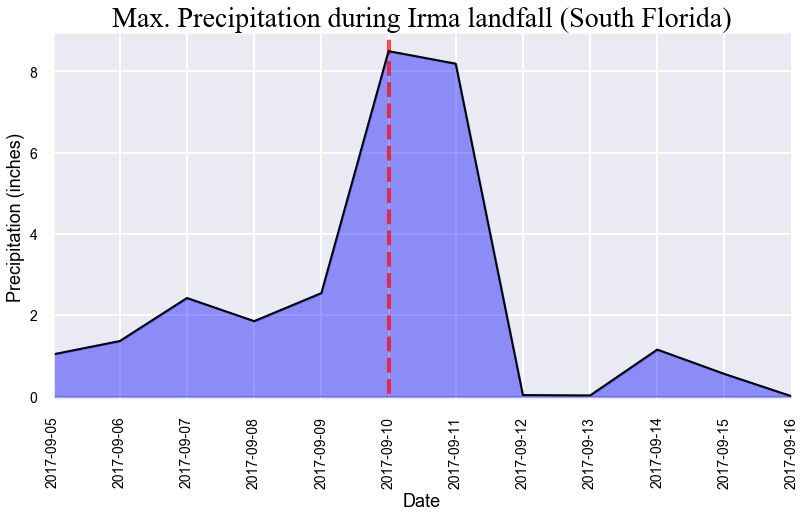

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_prcp_max["Date"]
y_data = df_prcp_max["Value"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Creating padding around the y limits
y_pad = abs(0.2*y_data.mean()) # 20% of mean y value
# Sets the y limits of the current chart
plt.ylim(-0.1,y_data.max()+y_pad )
# Plotting the data
plt.plot(x_data,y_data,color="black",linewidth = 2)
plt.fill_between(x_data,y_data,color = "blue", alpha = 0.4)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-09-10",(y_data.min()-y_pad),(y_data.max()+y_pad),color="red",alpha=0.7,linewidth=4,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Max. Precipitation during Irma landfall (South Florida)",fontsize=28,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Precipitation (inches)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Irma_Precipitation.png")
# Display the plot
plt.show()

## Let's create merged dataframe with minimum and maximum temperatures

In [20]:
# A copy of the minimum temperature dataframe with relevant colummns
df_min = df_MinTemp[["Date","Value"]]
# Let's groupby value column by date and count the minimum ocurrences
grouped_count = df_min["Value"].groupby(df_min["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_min_unsorted = grouped_count.min().to_frame("MinTemp")
# Let's sort the dataframe by date
df_min = df_min_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_min.reset_index(inplace=True)
# A copy of the maximum temperature dataframe with relevant colummns
df_max = df_MaxTemp[["Date","Value"]]
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_max["Value"].groupby(df_max["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_max_unsorted = grouped_count.max().to_frame("MaxTemp")
# Let's sort the dataframe by date
df_max = df_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_max.reset_index(inplace=True)
# Combine the dataframes into a single dataframe
df_MinMax = pd.merge(df_max, df_min, how="outer", on="Date")
# Save the dataframe to the output file
df_MinMax.to_csv("Output_Data/Irma_MinMax_Temp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the min-max temperature dataframe is:{}".format(df_MinMax.shape)+'\033[0m')
df_MinMax.head() # Display the dataframe

The shape of the min-max temperature dataframe is:(12, 3)


,Date,MaxTemp,MinTemp
0,2017-09-05,98.0,74.0
1,2017-09-06,96.0,72.0
2,2017-09-07,99.0,72.0
3,2017-09-08,97.0,72.0
4,2017-09-09,95.0,73.0


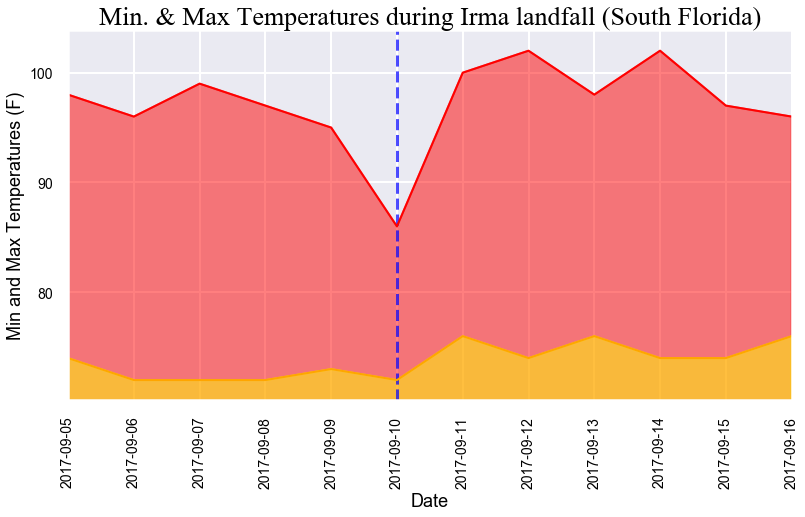

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_MinMax["Date"]
y_max = df_MinMax["MaxTemp"]
y_min = df_MinMax["MinTemp"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Creating padding around the x and y limits
y_pad = abs(0.025*y_min.mean()) # 2.5% of mean y value
# Sets the y limits of the current chart
plt.ylim(y_min.min()-y_pad,y_max.max()+y_pad )
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Plot Maximum Temperature data
plt.plot(x_data,y_max,color="red",linewidth = 2)
# Plot Minimum Temperature data
plt.plot(x_data,y_min,color="orange",linewidth = 2)
# Filling the area below the line plots
plt.fill_between(x_data,y_max,color = "red", alpha = 0.5)
plt.fill_between(x_data,y_min,color = "yellow", alpha = 0.5)
# Creating a vertical line denoting the landfall date
plt.vlines("2017-09-10",(y_min.min()-y_pad),(y_max.max()+y_pad),color="blue",alpha=0.7,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Min. & Max Temperatures during Irma landfall (South Florida)",fontsize=26,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Min and Max Temperatures (F)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Irma_MinMaxTemp.png")
# Display the plot
plt.show()